<a href="https://colab.research.google.com/github/aaditidekhane/UAV-Strategic-Deconfliction-System/blob/main/flytassgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONFLICT at (1, 2) time 1 with another drone!


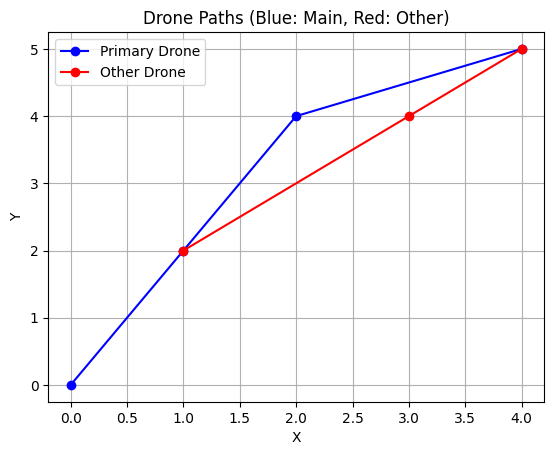

In [ ]:
# This is your starting point! Run this in a .py file or Jupyter notebook

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define your drone waypoints (x, y, time)
primary_drone = [
    {'x': 0, 'y': 0, 'time': 0},
    {'x': 1, 'y': 2, 'time': 1},
    {'x': 2, 'y': 4, 'time': 2},
    {'x': 4, 'y': 5, 'time': 3},
]

# Simulated flight of another drone
other_drone = [
    {'x': 1, 'y': 2, 'time': 1},
    {'x': 3, 'y': 4, 'time': 2},
    {'x': 4, 'y': 5, 'time': 3},
]

# Step 2: Detect conflicts
def detect_conflict(primary, others, safety_distance=0.5):
    for wp in primary:
        for wp_other in others:
            # Simple time match
            if wp['time'] == wp_other['time']:
                dist = np.linalg.norm([wp['x'] - wp_other['x'], wp['y'] - wp_other['y']])
                if dist < safety_distance:
                    print(f"CONFLICT at ({wp['x']}, {wp['y']}) time {wp['time']} with another drone!")
                    return True
    print("No conflicts detected.")
    return False

conflict = detect_conflict(primary_drone, other_drone)

# Step 3: Visualize
plt.plot([wp['x'] for wp in primary_drone], [wp['y'] for wp in primary_drone], 'bo-', label='Primary Drone')
plt.plot([wp['x'] for wp in other_drone], [wp['y'] for wp in other_drone], 'ro-', label='Other Drone')
plt.legend()
plt.title('Drone Paths (Blue: Main, Red: Other)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


In [ ]:
# Primary drone: sample path
primary_drone = [
    {'x': 0, 'y': 0, 'time': 0},
    {'x': 1, 'y': 2, 'time': 1},
    {'x': 2, 'y': 4, 'time': 2},
    {'x': 4, 'y': 5, 'time': 3},
]

# Other drones: sample paths
other_drones = [
    [
        {'x': 1, 'y': 2, 'time': 1},
        {'x': 3, 'y': 4, 'time': 2},
        {'x': 4, 'y': 5, 'time': 3},
    ],
    [
        {'x': 0, 'y': 1, 'time': 1},
        {'x': 2, 'y': 3, 'time': 2},
        {'x': 3, 'y': 4, 'time': 3},
    ]
]


CONFLICT with Drone C at (0, 0, 0) at time 0
CONFLICT with Drone A at (2, 2, 2) at time 2
CONFLICT with Drone B at (2, 2, 2) at time 2
CONFLICT with Drone C at (2, 2, 2) at time 2
CONFLICT with Drone B at (3, 3, 3) at time 3
CONFLICT with Drone C at (3, 3, 3) at time 3


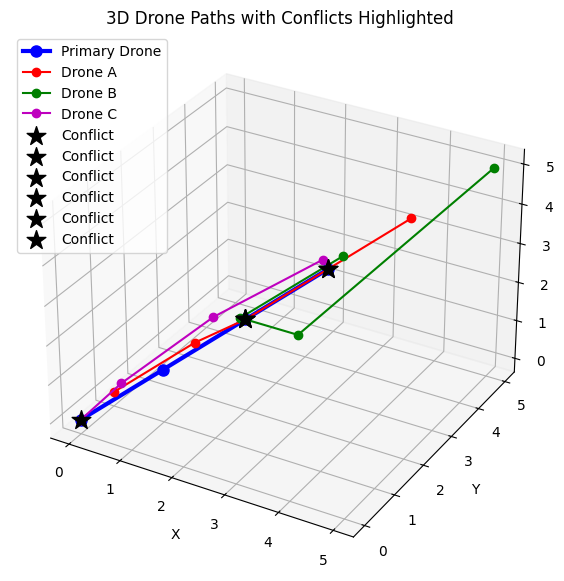

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Waypoint:
    def __init__(self, x, y, z, time):
        self.x = x
        self.y = y
        self.z = z
        self.time = time

class Drone:
    def __init__(self, drone_id, waypoints):
        self.drone_id = drone_id
        self.waypoints = waypoints

class ConflictChecker:
    def __init__(self, safety_distance=0.5):
        self.safety_distance = safety_distance

    def check_conflicts(self, primary_drone, other_drones):
        conflicts = []
        for wp in primary_drone.waypoints:
            for other in other_drones:
                for wp_other in other.waypoints:
                    if wp.time == wp_other.time:
                        dist = np.linalg.norm([wp.x - wp_other.x, wp.y - wp_other.y, wp.z - wp_other.z])
                        if dist < self.safety_distance:
                            conflicts.append({
                                "conflict_drone": other.drone_id,
                                "location": (wp.x, wp.y, wp.z),
                                "time": wp.time,
                            })
        return conflicts

# ----- DUMMY DATA -----
# Primary drone
primary_waypoints = [
    Waypoint(0, 0, 0, 0),
    Waypoint(1, 1, 1, 1),
    Waypoint(2, 2, 2, 2),
    Waypoint(3, 3, 3, 3),
]
primary_drone = Drone(drone_id="Primary", waypoints=primary_waypoints)

# Other drones
other_drones = [
    Drone("A", [Waypoint(0, 1, 0, 0), Waypoint(1, 2, 1, 1), Waypoint(2, 2, 2, 2), Waypoint(4, 4, 4, 3)]),
    Drone("B", [Waypoint(5, 5, 5, 0), Waypoint(3, 2, 2, 1), Waypoint(1.9, 2, 2, 2), Waypoint(3, 3.5, 3, 3)]),
    Drone("C", [Waypoint(0, 0, 0, 0), Waypoint(0.5, 0.5, 0.8, 1), Waypoint(1.5, 1.8, 2, 2), Waypoint(2.9, 3, 3.2, 3)]),
]

checker = ConflictChecker(safety_distance=0.6)
conflicts = checker.check_conflicts(primary_drone, other_drones)

# Print conflicts
if conflicts:
    for c in conflicts:
        print(f"CONFLICT with Drone {c['conflict_drone']} at {c['location']} at time {c['time']}")
else:
    print("No conflicts detected.")

# ----- 3D VISUALIZATION -----
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot primary drone path
x = [wp.x for wp in primary_drone.waypoints]
y = [wp.y for wp in primary_drone.waypoints]
z = [wp.z for wp in primary_drone.waypoints]
ax.plot(x, y, z, 'bo-', label='Primary Drone', linewidth=3, markersize=8)

# Plot other drones
colors = ['r', 'g', 'm']
for i, drone in enumerate(other_drones):
    x = [wp.x for wp in drone.waypoints]
    y = [wp.y for wp in drone.waypoints]
    z = [wp.z for wp in drone.waypoints]
    ax.plot(x, y, z, colors[i]+'o-', label=f'Drone {drone.drone_id}')

# Highlight conflicts
if conflicts:
    for c in conflicts:
        ax.scatter(c['location'][0], c['location'][1], c['location'][2], c='k', marker='*', s=200, label='Conflict')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Drone Paths with Conflicts Highlighted')
ax.legend()
plt.show()


CONFLICT with Drone C at (0, 0, 0) at time 0
CONFLICT with Drone A at (2, 2, 2) at time 2
CONFLICT with Drone B at (2, 2, 2) at time 2
CONFLICT with Drone C at (2, 2, 2) at time 2
CONFLICT with Drone B at (3, 3, 3) at time 3
CONFLICT with Drone C at (3, 3, 3) at time 3


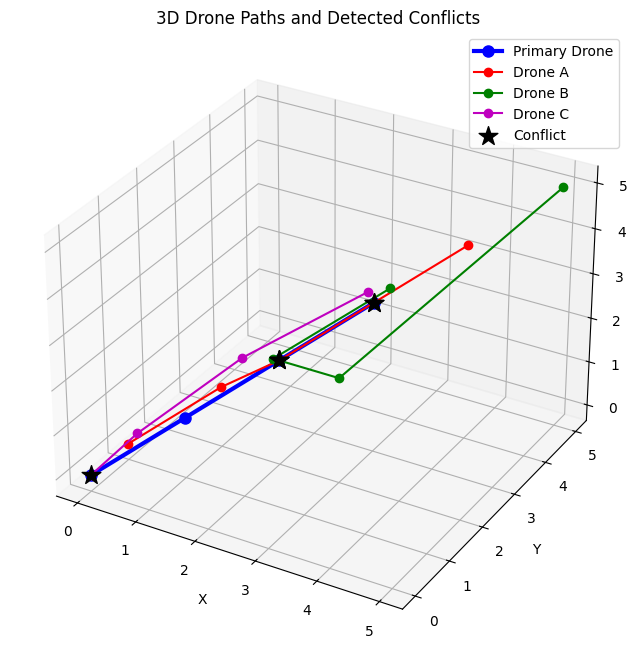

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Waypoint:
    """Represents a 3D waypoint with timestamp."""
    def __init__(self, x, y, z, time):
        self.x = x
        self.y = y
        self.z = z
        self.time = time

class Drone:
    """Represents a drone with a unique ID and a sequence of waypoints."""
    def __init__(self, drone_id, waypoints):
        self.drone_id = drone_id
        self.waypoints = waypoints

class DroneConflictDetector:
    """Detects spatial-temporal conflicts between drones."""
    def __init__(self, safety_distance=0.5):
        self.safety_distance = safety_distance

    def find_conflicts(self, main_drone, other_drones):
        """Finds all conflicts between main_drone and a list of other drones.
        Returns a list of conflict dictionaries."""
        conflicts = []
        for wp_main in main_drone.waypoints:
            for drone in other_drones:
                for wp_other in drone.waypoints:
                    if wp_main.time == wp_other.time:
                        distance = self._euclidean_distance(wp_main, wp_other)
                        if distance < self.safety_distance:
                            conflicts.append({
                                'other_drone_id': drone.drone_id,
                                'location': (wp_main.x, wp_main.y, wp_main.z),
                                'time': wp_main.time
                            })
        return conflicts

    @staticmethod
    def _euclidean_distance(wp1, wp2):
        """Calculates Euclidean distance between two 3D waypoints."""
        return np.linalg.norm([wp1.x - wp2.x, wp1.y - wp2.y, wp1.z - wp2.z])

def plot_drones_and_conflicts(main_drone, other_drones, conflicts):
    """Plots 3D flight paths of drones and highlights conflicts."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot main drone in blue
    x = [wp.x for wp in main_drone.waypoints]
    y = [wp.y for wp in main_drone.waypoints]
    z = [wp.z for wp in main_drone.waypoints]
    ax.plot(x, y, z, 'bo-', label='Primary Drone', linewidth=3, markersize=8)

    # Plot other drones in different colors
    colors = ['r', 'g', 'm', 'c', 'y']
    for i, drone in enumerate(other_drones):
        x = [wp.x for wp in drone.waypoints]
        y = [wp.y for wp in drone.waypoints]
        z = [wp.z for wp in drone.waypoints]
        color = colors[i % len(colors)]
        ax.plot(x, y, z, color + 'o-', label=f'Drone {drone.drone_id}')

    # Highlight conflict points
    for conflict in conflicts:
        ax.scatter(*conflict['location'], c='k', marker='*', s=200, label='Conflict' if conflict == conflicts[0] else "")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Drone Paths and Detected Conflicts')
    ax.legend()
    plt.show()

# ------------------- EXAMPLE USAGE -------------------

def generate_sample_data():
    """Returns a primary drone and a list of other drones with dummy 3D waypoints."""
    main_drone = Drone(
        'Primary',
        [
            Waypoint(0, 0, 0, 0),
            Waypoint(1, 1, 1, 1),
            Waypoint(2, 2, 2, 2),
            Waypoint(3, 3, 3, 3),
        ]
    )
    other_drones = [
        Drone('A', [
            Waypoint(0, 1, 0, 0),
            Waypoint(1, 2, 1, 1),
            Waypoint(2, 2, 2, 2),  # Conflict here!
            Waypoint(4, 4, 4, 3),
        ]),
        Drone('B', [
            Waypoint(5, 5, 5, 0),
            Waypoint(3, 2, 2, 1),
            Waypoint(1.9, 2, 2, 2),  # Near conflict
            Waypoint(3, 3.5, 3, 3),
        ]),
        Drone('C', [
            Waypoint(0, 0, 0, 0),   # Conflict here!
            Waypoint(0.5, 0.5, 0.8, 1),
            Waypoint(1.5, 1.8, 2, 2),
            Waypoint(2.9, 3, 3.2, 3),
        ]),
    ]
    return main_drone, other_drones

if __name__ == "__main__":
    # Generate sample drones
    main_drone, other_drones = generate_sample_data()

    # Initialize detector and find conflicts
    detector = DroneConflictDetector(safety_distance=0.6)
    conflicts = detector.find_conflicts(main_drone, other_drones)

    # Print all conflicts
    if conflicts:
        for c in conflicts:
            print(f"CONFLICT with Drone {c['other_drone_id']} at {c['location']} at time {c['time']}")
    else:
        print("No conflicts detected.")

    # Plot
    plot_drones_and_conflicts(main_drone, other_drones, conflicts)


In [ ]:
import csv
import random

NUM_DRONES = 10000
WAYPOINTS_PER_DRONE = 5
CSV_FILE = '10k_drones.csv'

with open(CSV_FILE, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['drone_id', 'x', 'y', 'z', 'time'])
    for i in range(NUM_DRONES):
        drone_id = f"Drone_{i+1}"
        # Give each drone a random start time to avoid total overlap
        base_time = random.randint(0, 100)
        for wp in range(WAYPOINTS_PER_DRONE):
            x = round(random.uniform(0, 100), 2)
            y = round(random.uniform(0, 100), 2)
            z = round(random.uniform(0, 20), 2)
            time = base_time + wp  # Ensures increasing time per drone
            writer.writerow([drone_id, x, y, z, time])

print(f"Done! Created {CSV_FILE} with {NUM_DRONES} drones and {WAYPOINTS_PER_DRONE} waypoints each.")


Done! Created 10k_drones.csv with 10000 drones and 5 waypoints each.


In [ ]:
import csv

csv_file = 'conflict_drones.csv'
with open(csv_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['drone_id', 'x', 'y', 'z', 'time'])

    # Primary drone path (deliberate conflicts)
    for i in range(5):
        writer.writerow(['Primary', i, i, i, i])

    # Other drone with overlapping waypoints at time 2 and 3
    writer.writerow(['A', 2, 2, 2, 2])
    writer.writerow(['A', 3, 3, 3, 3])
    # Rest of its waypoints are offset
    for i in [0,1,4]:
        writer.writerow(['A', i+10, i+10, i+10, i])

    # Drone B (no conflict)
    for i in range(5):
        writer.writerow(['B', i+20, i+20, i+20, i])

    # Drone C (conflict at time 0)
    writer.writerow(['C', 0, 0, 0, 0])
    for i in range(1,5):
        writer.writerow(['C', i+30, i+30, i+30, i])

print("Created 'conflict_drones.csv' with guaranteed conflicts!")


Created 'conflict_drones.csv' with guaranteed conflicts!


In [ ]:
import csv

# --- 1. Data Classes ---
class Waypoint:
    """Represents a 3D waypoint in space and time."""
    def __init__(self, x, y, z, time):
        self.x = float(x)
        self.y = float(y)
        self.z = float(z)
        self.time = int(time)

    def to_grid_cell(self, cell_size=1.0, time_step=1):
        """Discretize position/time to a grid cell."""
        return (
            int(self.x // cell_size),
            int(self.y // cell_size),
            int(self.z // cell_size),
            int(self.time // time_step)
        )

class Drone:
    """Represents a drone with a unique ID and a list of waypoints."""
    def __init__(self, drone_id, waypoints):
        self.drone_id = drone_id
        self.waypoints = waypoints  # List of Waypoint objects

# --- 2. File Loader with Validation ---
def load_drones_from_csv(file_path):
    drones = {}
    with open(file_path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        expected_fields = {'drone_id', 'x', 'y', 'z', 'time'}
        if set(reader.fieldnames) != expected_fields:
            raise ValueError(f"CSV must have columns: {expected_fields}")
        for row in reader:
            try:
                wp = Waypoint(row['x'], row['y'], row['z'], row['time'])
            except Exception as e:
                raise ValueError(f"Error parsing row {row}: {e}")
            drone_id = row['drone_id']
            drones.setdefault(drone_id, []).append(wp)
    return [Drone(d_id, wps) for d_id, wps in drones.items()]

# --- 3. Occupancy Grid Logic (High Performance) ---
class OccupancyGrid:
    """Fast occupancy lookup for drone conflict detection."""
    def __init__(self, drones, cell_size=1.0, time_step=1):
        self.cell_size = cell_size
        self.time_step = time_step
        self.grid = self._build_grid(drones)

    def _build_grid(self, drones):
        grid = {}
        for drone in drones:
            for wp in drone.waypoints:
                cell = wp.to_grid_cell(self.cell_size, self.time_step)
                grid.setdefault(cell, set()).add(drone.drone_id)
        return grid

    def is_occupied(self, cell, exclude_drone=None):
        drones_here = self.grid.get(cell, set())
        if exclude_drone:
            drones_here = {d for d in drones_here if d != exclude_drone}
        return drones_here

# --- 4. Conflict Detection and XAI Rerouting ---
class DroneDeconflictor:
    """Detects and resolves conflicts using an occupancy grid."""
    def __init__(self, primary_drone, other_drones, cell_size=1.0, time_step=1, max_shift=10):
        self.primary_drone = primary_drone
        self.other_drones = other_drones
        self.cell_size = cell_size
        self.time_step = time_step
        self.occupancy_grid = OccupancyGrid(other_drones, cell_size, time_step)
        self.max_shift = max_shift  # How far to shift in rerouting (cells)

    def detect_conflicts(self, drone=None):
        """Detects all conflicts for a given drone (default: primary)."""
        drone = drone or self.primary_drone
        conflicts = []
        for idx, wp in enumerate(drone.waypoints):
            cell = wp.to_grid_cell(self.cell_size, self.time_step)
            conflict_ids = self.occupancy_grid.is_occupied(cell, exclude_drone=drone.drone_id)
            if conflict_ids:
                conflicts.append({
                    'waypoint_idx': idx,
                    'location': (wp.x, wp.y, wp.z),
                    'time': wp.time,
                    'conflict_with': list(conflict_ids),
                })
        return conflicts

    def explain_conflicts(self, conflicts):
        """Returns an XAI-style explanation string."""
        if not conflicts:
            return "No conflicts detected. The path is clear."
        explanation = "Conflicts detected at the following waypoints:\n"
        for c in conflicts:
            explanation += (
                f"  - Waypoint {c['waypoint_idx']} at (x={c['location'][0]}, y={c['location'][1]}, z={c['location'][2]}), "
                f"time {c['time']} conflicts with drone(s): {', '.join(c['conflict_with'])}\n"
            )
        return explanation

    def simple_xai_reroute(self):
        """Try shifting conflicted waypoints in +x direction until no conflicts (basic XAI heuristic)."""
        rerouted = [Waypoint(wp.x, wp.y, wp.z, wp.time) for wp in self.primary_drone.waypoints]
        explanation = ""
        for shift in range(1, self.max_shift + 1):
            temp_drone = Drone(self.primary_drone.drone_id, rerouted)
            conflicts = self.detect_conflicts(temp_drone)
            if not conflicts:
                explanation += f"Reroute succeeded after {shift-1} shift(s). New path is conflict free.\n"
                return Drone(self.primary_drone.drone_id + "_rerouted", rerouted), explanation
            explanation += f"Attempt {shift}: {len(conflicts)} conflict(s). Shifting conflicted waypoints in +x.\n"
            # Shift only conflicted waypoints in +x
            for c in conflicts:
                idx = c['waypoint_idx']
                rerouted[idx].x += self.cell_size  # Shift by one cell_size
        explanation += "Max reroute attempts reached. Conflicts remain.\n"
        return Drone(self.primary_drone.drone_id + "_rerouted", rerouted), explanation

# --- 5. DEMO FILE GENERATION (Guaranteed Conflicts) ---
def generate_conflict_csv(filename='conflict_drones.csv'):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['drone_id', 'x', 'y', 'z', 'time'])
        # Primary: path with overlap at (2,2,2,2) and (3,3,3,3)
        for i in range(5):
            writer.writerow(['Primary', i, i, i, i])
        # Drone A: Conflicts at 2 and 3
        writer.writerow(['A', 2, 2, 2, 2])
        writer.writerow(['A', 3, 3, 3, 3])
        for i in [0,1,4]:
            writer.writerow(['A', i+10, i+10, i+10, i])
        # Drone B: No conflict
        for i in range(5):
            writer.writerow(['B', i+20, i+20, i+20, i])
        # Drone C: Conflict at time 0
        writer.writerow(['C', 0, 0, 0, 0])
        for i in range(1,5):
            writer.writerow(['C', i+30, i+30, i+30, i])

# --- 6. MAIN EXECUTION (Everything Tied Together) ---
if __name__ == "__main__":
    # Step 1: Create the test file (skip if already present)
    generate_conflict_csv('conflict_drones.csv')
    csv_file = 'conflict_drones.csv'

    # Step 2: Load data
    all_drones = load_drones_from_csv(csv_file)
    primary_drone = next((d for d in all_drones if d.drone_id == 'Primary'), None)
    other_drones = [d for d in all_drones if d.drone_id != 'Primary']

    if not primary_drone:
        raise ValueError("No primary drone found in the CSV.")

    # Step 3: Initialize deconflictor and check conflicts
    deconflictor = DroneDeconflictor(primary_drone, other_drones, cell_size=1.0, time_step=1, max_shift=10)
    conflicts = deconflictor.detect_conflicts()

    print("----- INITIAL PATH CHECK -----")
    print(deconflictor.explain_conflicts(conflicts))

    # Step 4: Reroute if conflicts found, and explain
    if conflicts:
        print("----- ATTEMPTING REROUTE (XAI Heuristic) -----")
        rerouted_drone, xai_explanation = deconflictor.simple_xai_reroute()
        rerouted_conflicts = deconflictor.detect_conflicts(rerouted_drone)
        print(xai_explanation)
        print(deconflictor.explain_conflicts(rerouted_conflicts))
        print("----- REROUTED WAYPOINTS -----")
        for i, wp in enumerate(rerouted_drone.waypoints):
            print(f"  {i}: (x={wp.x}, y={wp.y}, z={wp.z}, t={wp.time})")
    else:
        print("No rerouting necessary. Path is clear.")


----- INITIAL PATH CHECK -----
Conflicts detected at the following waypoints:
  - Waypoint 0 at (x=0.0, y=0.0, z=0.0), time 0 conflicts with drone(s): C
  - Waypoint 2 at (x=2.0, y=2.0, z=2.0), time 2 conflicts with drone(s): A
  - Waypoint 3 at (x=3.0, y=3.0, z=3.0), time 3 conflicts with drone(s): A

----- ATTEMPTING REROUTE (XAI Heuristic) -----
Attempt 1: 3 conflict(s). Shifting conflicted waypoints in +x.
Reroute succeeded after 1 shift(s). New path is conflict free.

No conflicts detected. The path is clear.
----- REROUTED WAYPOINTS -----
  0: (x=1.0, y=0.0, z=0.0, t=0)
  1: (x=1.0, y=1.0, z=1.0, t=1)
  2: (x=3.0, y=2.0, z=2.0, t=2)
  3: (x=4.0, y=3.0, z=3.0, t=3)
  4: (x=4.0, y=4.0, z=4.0, t=4)


In [ ]:
!pip install plotly


In [ ]:
import plotly.graph_objects as go

def plotly_drones_3d(primary, rerouted, others, orig_conflicts, rerouted_conflicts):
    fig = go.Figure()

    # Plot other drones
    colors = ['green', 'purple', 'brown', 'gray', 'pink']
    for i, drone in enumerate(others):
        x = [wp.x for wp in drone.waypoints]
        y = [wp.y for wp in drone.waypoints]
        z = [wp.z for wp in drone.waypoints]
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines+markers',
            line=dict(color=colors[i % len(colors)], width=4),
            marker=dict(size=8, symbol='circle'),
            name=f'Drone {drone.drone_id}',
            opacity=0.5
        ))

    # Plot primary path
    x0 = [wp.x for wp in primary.waypoints]
    y0 = [wp.y for wp in primary.waypoints]
    z0 = [wp.z for wp in primary.waypoints]
    fig.add_trace(go.Scatter3d(
        x=x0, y=y0, z=z0,
        mode='lines+markers',
        line=dict(color='blue', width=8),
        marker=dict(size=12, symbol='diamond'),
        name='Primary (Original)',
        opacity=1
    ))

    # Plot rerouted path if exists
    if rerouted and rerouted.drone_id != primary.drone_id:
        xr = [wp.x for wp in rerouted.waypoints]
        yr = [wp.y for wp in rerouted.waypoints]
        zr = [wp.z for wp in rerouted.waypoints]
        fig.add_trace(go.Scatter3d(
            x=xr, y=yr, z=zr,
            mode='lines+markers',
            line=dict(color='orange', width=8, dash='dash'),
            marker=dict(size=12, symbol='diamond-open'),
            name='Primary (Rerouted)',
            opacity=1
        ))

    # Plot conflict points (original) with 'diamond' marker
    for c in orig_conflicts:
        fig.add_trace(go.Scatter3d(
            x=[c['location'][0]], y=[c['location'][1]], z=[c['location'][2]],
            mode='markers+text',
            marker=dict(size=22, color='red', symbol='diamond'),  # FIX: use 'diamond'
            name=f"Conflict {','.join(c['conflict_with'])}@t={c['time']}",
            text=[f"⚠️ {','.join(c['conflict_with'])}@t={c['time']}"],
            textposition="top center",
            showlegend=False
        ))

    # Plot conflict points (rerouted) with 'diamond' marker
    for c in rerouted_conflicts:
        fig.add_trace(go.Scatter3d(
            x=[c['location'][0]], y=[c['location'][1]], z=[c['location'][2]],
            mode='markers+text',
            marker=dict(size=22, color='gold', symbol='diamond'),
            name=f"Rerouted Conflict {','.join(c['conflict_with'])}@t={c['time']}",
            text=[f"⚠️ {','.join(c['conflict_with'])}@t={c['time']}"],
            textposition="top center",
            showlegend=False
        ))

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z (Altitude)',
            xaxis=dict(showbackground=True, backgroundcolor='#f8faff'),
            yaxis=dict(showbackground=True, backgroundcolor='#f8faff'),
            zaxis=dict(showbackground=True, backgroundcolor='#f8faff'),
        ),
        title=dict(
            text='<b>UAV Strategic Deconfliction: Interactive 3D Visualization</b>',
            font=dict(size=22, color='#223366')
        ),
        legend=dict(
            x=0.01, y=0.99,
            bgcolor='rgba(255,255,255,0.8)',
            bordercolor='#aaa',
            font=dict(size=16)
        ),
        margin=dict(l=0, r=0, b=0, t=60),
        height=800,
        width=1200
    )

    fig.show()

# -------- USAGE --------
# After your main reroute/conflict code:
# Ensure these exist: primary_drone, rerouted_drone, other_drones, conflicts, rerouted_conflicts
plotly_drones_3d(primary_drone, rerouted_drone, other_drones, conflicts, rerouted_conflicts)


In [ ]:
print("Conflicts before rerouting:", conflicts)


Conflicts before rerouting: [{'waypoint_idx': 0, 'location': (0.0, 0.0, 0.0), 'time': 0, 'conflict_with': ['C']}, {'waypoint_idx': 2, 'location': (2.0, 2.0, 2.0), 'time': 2, 'conflict_with': ['A']}, {'waypoint_idx': 3, 'location': (3.0, 3.0, 3.0), 'time': 3, 'conflict_with': ['A']}]


In [ ]:
print("Original Waypoints:")
for wp in primary_drone.waypoints:
    print(wp.x, wp.y, wp.z, wp.time)

print("Rerouted Waypoints:")
for wp in rerouted_drone.waypoints:
    print(wp.x, wp.y, wp.z, wp.time)


Original Waypoints:
0.0 0.0 0.0 0
1.0 1.0 1.0 1
2.0 2.0 2.0 2
3.0 3.0 3.0 3
4.0 4.0 4.0 4
Rerouted Waypoints:
1.0 0.0 0.0 0
1.0 1.0 1.0 1
3.0 2.0 2.0 2
4.0 3.0 3.0 3
4.0 4.0 4.0 4


In [ ]:
plotly_drones_3d(primary_drone, rerouted_drone, other_drones, conflicts, rerouted_conflicts)
